Epoch 1/100
25/25 [==============================] - 9s 87ms/step - loss: 208.5603 - val_loss: 230.6576
Epoch 2/100
25/25 [==============================] - 1s 23ms/step - loss: 85.0113 - val_loss: 144.8030
Epoch 3/100
25/25 [==============================] - 1s 22ms/step - loss: 65.7963 - val_loss: 119.7248
Epoch 4/100
25/25 [==============================] - 1s 22ms/step - loss: 59.0800 - val_loss: 104.1868
Epoch 5/100
25/25 [==============================] - 1s 22ms/step - loss: 56.3550 - val_loss: 93.6531
Epoch 6/100
25/25 [==============================] - 1s 22ms/step - loss: 54.9002 - val_loss: 86.3661
Epoch 7/100
25/25 [==============================] - 1s 22ms/step - loss: 54.9937 - val_loss: 82.5803
Epoch 8/100
25/25 [==============================] - 1s 22ms/step - loss: 53.1781 - val_loss: 79.1458
Epoch 9/100
25/25 [==============================] - 1s 34ms/step - loss: 52.6809 - val_loss: 78.0861
Epoch 10/100
25/25 [==============================] - 1s 34ms/step - loss: 53

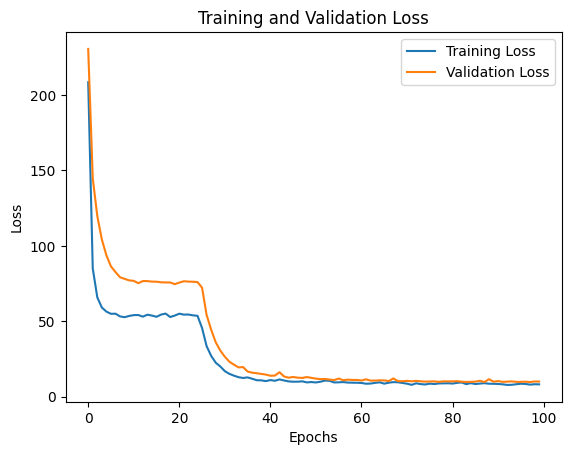

15/15 [==============================] - 0s 7ms/step


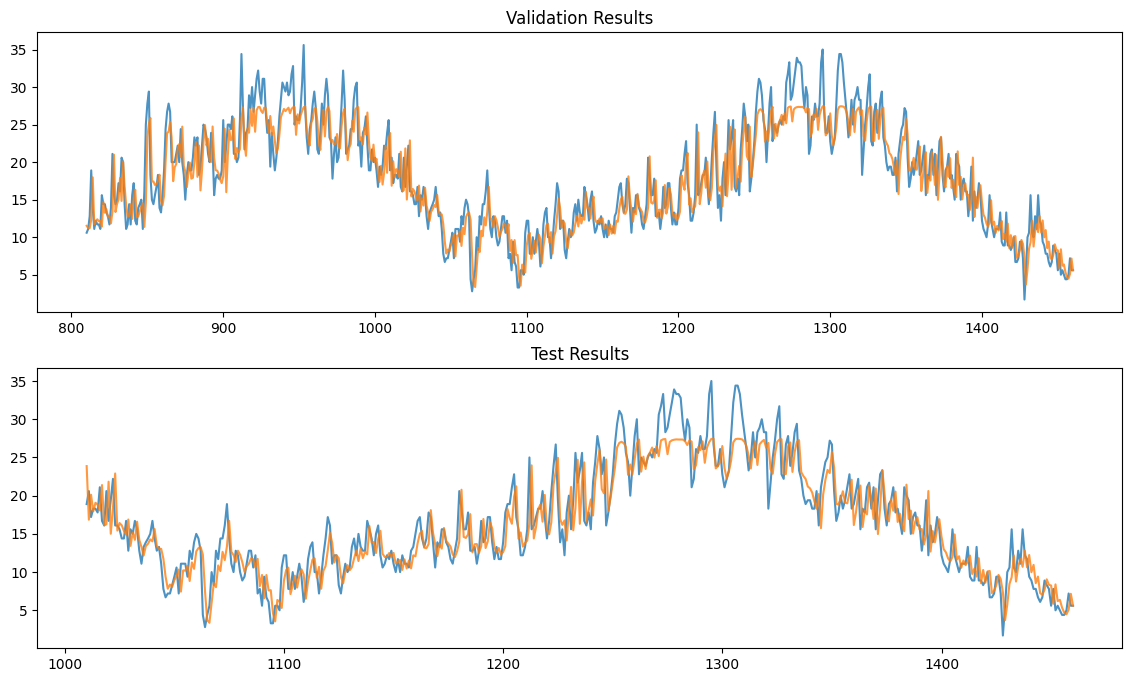

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

# Load data
df = pd.read_csv('/content/seattle-weather.csv')

# Define window size
WINDOW = 10

# Convert 'Open' column into numpy array
training_set = df.iloc[:, 2:3].values

def df_to_XY(df, window_size=10):
    X_train = []
    y_train = []

    for i in range(window_size, len(df)):
        X_train.append(df[i-window_size:i, 0])
        y_train.append(df[i, 0])

    X_train, y_train = np.array(X_train), np.array(y_train)
    return X_train, y_train

# Generate X and y
X, y = df_to_XY(training_set, WINDOW)

# Split the dataset
X_train = X[:800]
y_train = y[:800]
X_val = X[800:1000]
y_val = y[800:1000]
X_test = X[1000:]
y_test = y[1000:]

# Reshape input data
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Building the RNN
regressor = Sequential()

regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

regressor.compile(optimizer='adam', loss='mean_squared_error')

# Fitting the RNN to the training set
history = regressor.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32)

# Plotting training and validation loss
history_df = pd.DataFrame(history.history)
plt.plot(history_df['loss'], label='Training Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Make predictions
train_pred = regressor.predict(X_train).flatten()
val_pred = regressor.predict(X_val).flatten()
test_pred = regressor.predict(X_test).flatten()

# Concatenate predictions
pred = np.concatenate([train_pred, val_pred, test_pred])

# Create DataFrame for actual and predicted values
df_pred = pd.DataFrame(df["temp_max"].copy())
df_pred.columns = ["actual"]
df_pred = df_pred[WINDOW:]
df_pred["predicted"] = pred

# Plotting results
plt.figure(figsize=(14, 8))
plt.subplot(2, 1, 1)
plt.title("Validation Results")
plt.plot(df_pred[800:], alpha=0.8)
plt.subplot(2, 1, 2)
plt.title("Test Results")
plt.plot(df_pred[1000:], alpha=0.8)
plt.show()
